In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

data_all = pd.read_csv('sample_data/sensor_data.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()

features_to_normalize = ['accelerometer1', 'accelerometer2', 'accelerometer3', 'gyroscope1', 'gyroscope2', 'gyroscope3', 'roll', 'pitch']
x = scaler.fit_transform(data_all[features_to_normalize])
x = pd.DataFrame(x, columns = features_to_normalize)
y = data_all.tapped_zone  # only the tapping zone

x = x.dropna()
y = y.dropna()

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [4]:
import tensorflow as tf
y_train_encoded = tf.keras.utils.to_categorical(y_train)  # one-hot encoding for training target
y_val_encoded = tf.keras.utils.to_categorical(y_val)      # one-hot encoding for validate target

In [5]:
model = RandomForestClassifier(n_estimators=200, max_depth=50)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=200)

In [6]:
model.score(x_val, y_val)

1.0

In [7]:
#import the testing .csv file
test_data_all = pd.read_csv('sample_data/sensor_data_test.csv')

# test data preprocessing
# x_test = test_data_all.drop(['__id__', 'tapped_zone', 'tap_position_x', 'tap_position_y'], axis=1)  # Drop evertyig except sensory data
y_test = test_data_all.tapped_zone  # only the tapping zone

# normalization
x_test = scaler.fit_transform(test_data_all[features_to_normalize])
x_test = pd.DataFrame(x_test, columns = features_to_normalize)

# drop the wrong record
x_test = x_test.dropna()
y_test = y_test.dropna()

# one-hot encoding for test target
y_test_encoded = tf.keras.utils.to_categorical(y_test)  

x_test.head()

,accelerometer1,accelerometer2,accelerometer3,gyroscope1,gyroscope2,gyroscope3,roll,pitch
0,-1.44069,-0.91736,-0.13765,1.40273,-1.33214,-0.42705,-1.54455,-0.89796
1,0.19317,0.63330,-0.60339,-0.53080,0.32305,-1.47860,0.11053,0.76728
2,-0.57066,0.19121,-0.04607,-0.97563,-0.61339,0.49138,-0.66046,0.24830
3,1.04363,-1.02163,-0.60983,0.60556,1.37136,1.02742,1.10871,-1.18910
4,0.96656,-0.33246,0.13626,0.75385,1.33442,1.00976,0.85463,-0.25455


In [8]:
model.score(x_test, y_test)

0.9791666666666666

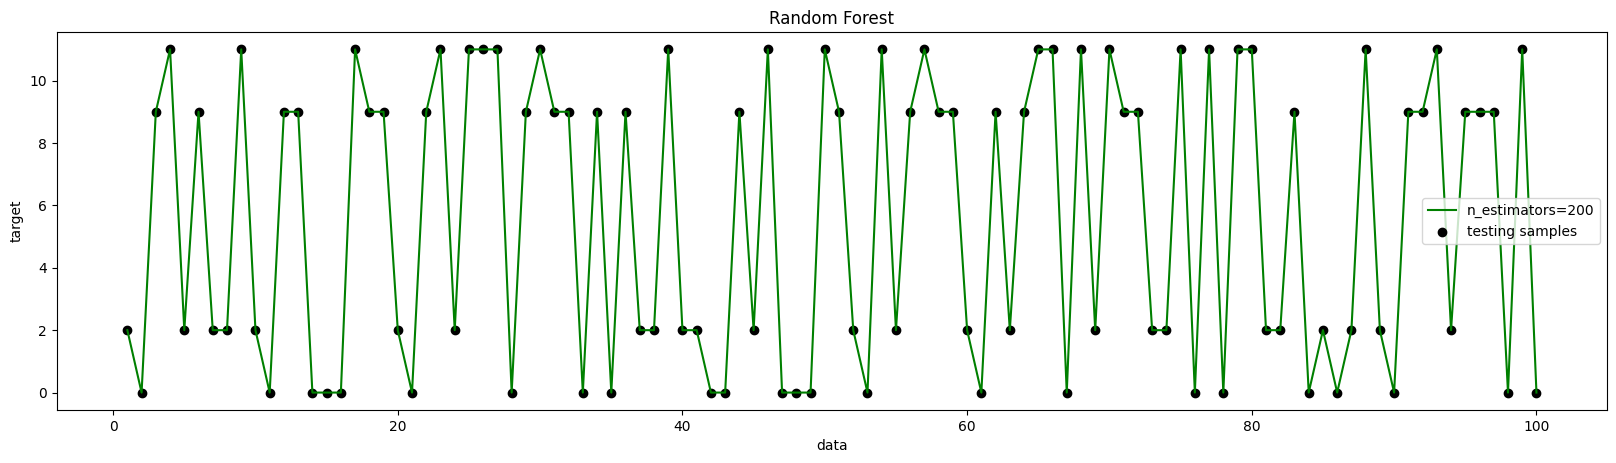

In [9]:
import numpy as np
import matplotlib.pyplot as plt

prediction = model.predict(x_val)
indices = [x for x in range(1, 1681)]
plt.figure(figsize=(20, 5), dpi=100)
plt.scatter(indices[:100], y_val[:100], c='k', label='testing samples')
plt.plot(indices[:100], prediction[:100], c='g', label='n_estimators=200')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Random Forest')
plt.legend()
plt.show()

ValueError: ignored

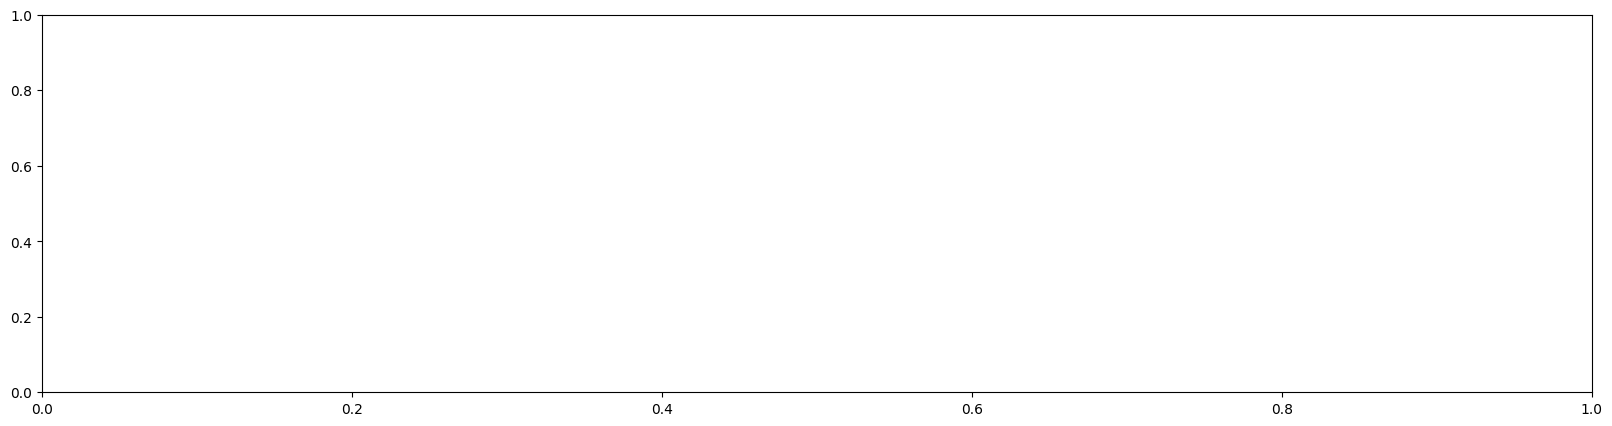

In [10]:
test_prediction = model.predict(x_test)

plt.figure(figsize=(20, 5), dpi=100)
plt.scatter(indices[1:63], y_test, c='k', label='real practice samples')
plt.plot(indices[1:63], test_prediction, c='r', label='n_estimators=200')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Random Forest')
plt.legend()
plt.show()